<a href="https://colab.research.google.com/github/IrakizaGaius/PeerGroup8WaterQualityModel/blob/main/Peer_Group_8__formative_II___(1)_ipynb_Tamanda_Kaunda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [3]:
#LOAD THE DATA

import pandas as pd
import numpy as np
import tensorflow as tf
data = pd.read_csv("/content/water_potability.csv")
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score

data.head(10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [4]:
# Information on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
# Brief overview of the dataset statistics
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
# drop duplicates rows of data

data = data.drop_duplicates()

In [7]:
# percentage of missingness in the data for each column

missing = data.isnull().mean()*100
print(missing)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


In [8]:
# MICE IMPUTATION to fill the missing data
# create the imputer using MICE

# separate the target variable from the rest of the data to make sure it is not changed or imputed
features = data.drop(columns='Potability')
target = data.Potability
imputer = IterativeImputer(random_state=0)
features_imputed = imputer.fit_transform(features)

# convert the data back into a dataframe
features_imputed = pd.DataFrame(features_imputed, columns=features.columns)

# merge target variable and data
data_imputed = pd.concat([features_imputed, target], axis=1)
data_imputed.head(10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.190863,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,344.836463,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,331.981769,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,6.927779,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [9]:
# confirm imputed data
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [10]:
# Remove outliers that may affect the neural network's accuracy using IQR method
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # anything above or below this is an outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # place outliers in a data frame
    print(f"{df[column_name]}")
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers)/len(df)*100:.2f}%")

    # remove outliers

    df_clean = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df_clean

# columns to remove outliers in
columns = ['Hardness', 'Solids', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

data_imputed_copy = data_imputed.copy()

for i in columns:
  data_imputed_copy = remove_outliers_iqr(data_imputed_copy, i)

0       204.890455
1       129.422921
2       224.236259
3       214.373394
4       181.101509
           ...    
3271    193.681735
3272    193.553212
3273    175.762646
3274    230.603758
3275    195.102299
Name: Hardness, Length: 3276, dtype: float64
Number of outliers: 83
Percentage of outliers: 2.53%
0       20791.318981
1       18630.057858
2       19909.541732
3       22018.417441
4       17978.986339
            ...     
3271    47580.991603
3272    17329.802160
3273    33155.578218
3274    11983.869376
3275    17404.177061
Name: Solids, Length: 3193, dtype: float64
Number of outliers: 42
Percentage of outliers: 1.32%
0       368.516441
1       344.836463
2       331.981769
3       356.886136
4       310.135738
           ...    
3270    345.700257
3272    338.612062
3273    326.848982
3274    336.993878
3275    338.025733
Name: Sulfate, Length: 3151, dtype: float64
Number of outliers: 230
Percentage of outliers: 7.30%
0       564.308654
1       592.885359
2       418.606213
3 

Plot the Data Appropriately

In [11]:

# generate 2d classification dataset
# X, y = pass

# Transforms data to have mean=0 and standard deviation=1

scaler = StandardScaler()

X = data_imputed_copy.drop(columns='Potability', axis=1)
y= data_imputed_copy['Potability']

X_scaled = scaler.fit_transform(X)

# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# X_2d_pca = pca.fit_transform(X_scaled)

X_scaled.shape


(2830, 9)

In [12]:

# Split the data into training validation and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3,random_state=42,
    stratify=y               # Keep same class distribution in all splits
)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,stratify=y_temp)

print(f"\n=== FINAL SHAPES ===")
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_val: {y_val.shape}")
print(f"y_test: {y_test.shape}")




=== FINAL SHAPES ===
X_train: (1981, 9)
X_val: (424, 9)
X_test: (425, 9)
y_train: (1981,)
y_val: (424,)
y_test: (425,)


# Each Member Defines their model Here

In [40]:
#Model Definition by member 4
!pip install tensorflow
def model_tamanda_kaunda():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(96, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(48, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.0005)),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(24, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.0005)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(12, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.0001)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall'),
            tf.keras.metrics.AUC(name='auc')
        ]
    )

    return model

tamanda_model = model_tamanda_kaunda()

early_stopping_4 = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=35,
    min_delta=0.001,
    restore_best_weights=True
)

history = tamanda_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=250,
    batch_size=64,
    verbose=1,
    callbacks=[early_stopping_4]
)

Epoch 1/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.5050 - auc: 0.4817 - loss: 1.1209 - precision: 0.3657 - recall: 0.4489 - val_accuracy: 0.6297 - val_auc: 0.4626 - val_loss: 1.0622 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6194 - auc: 0.4872 - loss: 1.0606 - precision: 0.4129 - recall: 0.0261 - val_accuracy: 0.6297 - val_auc: 0.4899 - val_loss: 1.0285 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6335 - auc: 0.5171 - loss: 1.0213 - precision: 0.6628 - recall: 0.0123 - val_accuracy: 0.6297 - val_auc: 0.5147 - val_loss: 0.9986 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6318 - auc: 0.5478 - loss: 0.9886 - precision: 0.8576 - recall: 0.0122 - val_accuracy: 0.6297 - val_auc: 0.5570 - val_loss: 0.9664 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epo

In [52]:
best_epoch = np.argmin(history.history['val_loss'])
print(f"Best Epoch: {best_epoch+1}")
print(f"Train Accuracy at Best Epoch: {history.history['accuracy'][best_epoch]:.4f}")
print(f"Val Accuracy at Best Epoch: {history.history['val_accuracy'][best_epoch]:.4f}")

Best Epoch: 92
Train Accuracy at Best Epoch: 0.6734
Val Accuracy at Best Epoch: 0.7075


In [53]:
test_loss, test_accuracy, test_precision, test_recall, test_auc = tamanda_model.evaluate(X_test, y_test, verbose=1)

# Print results with clear formatting
print("\nTest Evaluation Metrics:")
print(f"  Loss      : {test_loss:.4f}")
print(f"  Accuracy  : {test_accuracy:.4f}")
print(f"  Precision : {test_precision:.4f}")
print(f"  Recall    : {test_recall:.4f}")
print(f"  AUC       : {test_auc:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6167 - auc: 0.6375 - loss: 0.6701 - precision: 0.4989 - recall: 0.2826 

Test Evaluation Metrics:
  Loss      : 0.6587
  Accuracy  : 0.6494
  Precision : 0.5476
  Recall    : 0.2930
  AUC       : 0.6487


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Classification Report:

              precision    recall  f1-score   support

           0     0.6745    0.8582    0.7553       268
           1     0.5476    0.2930    0.3817       157

    accuracy                         0.6494       425
   macro avg     0.6111    0.5756    0.5685       425
weighted avg     0.6276    0.6494    0.6173       425



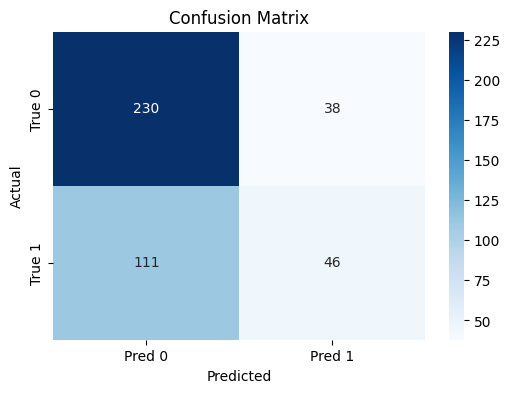

In [54]:
#Classification report and Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_probs = tamanda_model.predict(X_test)

# Convert probabilities to binary class predictions (threshold = 0.5)
y_pred = (y_pred_probs > 0.5).astype(int)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [55]:
tamanda_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 96)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 48)             │         4,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 24)             │         1,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,212 (55.52 KB)

 Trainable params: 7,105 (27.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,107 (27.77 KB)